In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Reading the csv file, processing the data, encoding the categorical variables

In [2]:
uc=pd.read_csv('uptake.csv')

In [3]:
uc.head()

,Products,year,Mode of Administration,Efficacy (hours),Side Effects,Order of Entry,peak potential (%)
0,Product 1,1,Intravenous,2,Moderate,1,19.10
1,Product 2,1,Intravenous,4,Moderate to Severe,2,25.55
2,Product 3,1,Oral Pill,2,Mild,3,9.89
3,Product 4,1,Oral Pill,3,Moderate,4,8.02
4,Product 5,1,Oral Pill,4,Mild,5,0.33


In [4]:
k= uc['peak potential (%)']

In [5]:
uc = uc.drop(['peak potential (%)'], axis=1)

In [6]:
uc = pd.get_dummies(uc, columns= ['Mode of Administration', 'Side Effects'], drop_first= True)

In [7]:
uc.head()

,Products,year,Efficacy (hours),Order of Entry,Mode of Administration_Liquid Syrup,Mode of Administration_Oral Pill,Side Effects_Moderate,Side Effects_Moderate to Severe
0,Product 1,1,2,1,0,0,1,0
1,Product 2,1,4,2,0,0,0,1
2,Product 3,1,2,3,0,1,0,0
3,Product 4,1,3,4,0,1,1,0
4,Product 5,1,4,5,0,1,0,0


In [8]:
uc.tail()

,Products,year,Efficacy (hours),Order of Entry,Mode of Administration_Liquid Syrup,Mode of Administration_Oral Pill,Side Effects_Moderate,Side Effects_Moderate to Severe
47,RELIEVE,4,2,7,0,1,0,0
48,RELIEVE,5,2,7,0,1,0,0
49,RELIEVE,6,2,7,0,1,0,0
50,RELIEVE,7,2,7,0,1,0,0
51,RELIEVE,8,2,7,0,1,0,0


In [9]:
k

0      19.10
1      25.55
2       9.89
3       8.02
4       0.33
5      12.16
6      51.59
7      62.60
8      28.44
9      22.84
10      2.44
11     33.26
12     73.32
13     80.23
14     45.78
15     37.65
16      7.55
17     48.56
18     87.77
19     87.94
20     68.19
21     52.47
22     17.66
23     59.06
24     97.01
25     92.40
26     92.31
27     67.28
28     36.74
29     67.47
30    100.00
31     95.73
32    100.00
33     82.10
34     66.33
35     75.05
36     98.69
37     96.30
38     91.89
39     93.88
40    100.00
41    100.00
42    100.00
43    100.00
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
Name: peak potential (%), dtype: float64

In [10]:
uc = pd.concat([uc, k], axis=1)

In [11]:
uc.head()

,Products,year,Efficacy (hours),Order of Entry,Mode of Administration_Liquid Syrup,Mode of Administration_Oral Pill,Side Effects_Moderate,Side Effects_Moderate to Severe,peak potential (%)
0,Product 1,1,2,1,0,0,1,0,19.10
1,Product 2,1,4,2,0,0,0,1,25.55
2,Product 3,1,2,3,0,1,0,0,9.89
3,Product 4,1,3,4,0,1,1,0,8.02
4,Product 5,1,4,5,0,1,0,0,0.33


In [12]:
uc.tail()

,Products,year,Efficacy (hours),Order of Entry,Mode of Administration_Liquid Syrup,Mode of Administration_Oral Pill,Side Effects_Moderate,Side Effects_Moderate to Severe,peak potential (%)
47,RELIEVE,4,2,7,0,1,0,0,NaN
48,RELIEVE,5,2,7,0,1,0,0,NaN
49,RELIEVE,6,2,7,0,1,0,0,NaN
50,RELIEVE,7,2,7,0,1,0,0,NaN
51,RELIEVE,8,2,7,0,1,0,0,NaN


### Setting independent variables as X and dependent variables as y and values to be predicted as x_pred

In [13]:
X= uc.iloc[:-8,1:-1]
y= uc.iloc[:-8,-1]
X_pred = uc.iloc[-8:,1:-1]

In [14]:
X

,year,Efficacy (hours),Order of Entry,Mode of Administration_Liquid Syrup,Mode of Administration_Oral Pill,Side Effects_Moderate,Side Effects_Moderate to Severe
0,1,2,1,0,0,1,0
1,1,4,2,0,0,0,1
2,1,2,3,0,1,0,0
3,1,3,4,0,1,1,0
4,1,4,5,0,1,0,0
5,1,6,6,1,0,0,0
6,2,2,1,0,0,1,0
7,2,4,2,0,0,0,1
8,2,2,3,0,1,0,0
9,2,3,4,0,1,1,0


In [15]:
y

0      19.10
1      25.55
2       9.89
3       8.02
4       0.33
5      12.16
6      51.59
7      62.60
8      28.44
9      22.84
10      2.44
11     33.26
12     73.32
13     80.23
14     45.78
15     37.65
16      7.55
17     48.56
18     87.77
19     87.94
20     68.19
21     52.47
22     17.66
23     59.06
24     97.01
25     92.40
26     92.31
27     67.28
28     36.74
29     67.47
30    100.00
31     95.73
32    100.00
33     82.10
34     66.33
35     75.05
36     98.69
37     96.30
38     91.89
39     93.88
40    100.00
41    100.00
42    100.00
43    100.00
Name: peak potential (%), dtype: float64

In [16]:
X_pred

,year,Efficacy (hours),Order of Entry,Mode of Administration_Liquid Syrup,Mode of Administration_Oral Pill,Side Effects_Moderate,Side Effects_Moderate to Severe
44,1,2,7,0,1,0,0
45,2,2,7,0,1,0,0
46,3,2,7,0,1,0,0
47,4,2,7,0,1,0,0
48,5,2,7,0,1,0,0
49,6,2,7,0,1,0,0
50,7,2,7,0,1,0,0
51,8,2,7,0,1,0,0


### Trying out various models to predict the outcome

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
### Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [19]:
y_pred= reg.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.706672112570309

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X_pred)

In [22]:
y_pred

array([ 10.393008  ,  23.88532328,  37.37763855,  50.86995382,
        64.36226909,  77.85458436,  91.34689963, 104.8392149 ])

In [23]:
## Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=4).fit(X_train,y_train)
y_pred= clf.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8776149982835444

In [25]:
#from sklearn import linear_model
clf = linear_model.Lasso(alpha=4).fit(X,y)
y_pred= clf.predict(X_pred)

In [26]:
y_pred

array([ 2.35730969, 14.79869927, 27.24008885, 39.68147843, 52.12286801,
       64.56425759, 77.00564717, 89.44703675])

In [27]:
## Random forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=8, random_state=10)
regr.fit(X_train, y_train)
y_pred= regr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9229365002662305

In [29]:
## Final predicted outcome
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=8, random_state=10)
regr.fit(X, y)
y_pred = regr.predict(X_pred)
y_pred

array([ 7.5867, 17.4949, 29.5333, 42.3728, 57.579 , 76.1663, 92.5678,
       98.118 ])

In [30]:
year=[2025,2026,2027,2028,2029,2030,2031,2032]

In [31]:
percentage_of_peak = y_pred

In [32]:
year

[2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]

### Plotting graphs of obtained data

In [33]:
graph_df=pd.DataFrame({'year':year,'percentage of peak': percentage_of_peak})

In [34]:
graph_df

,year,percentage of peak
0,2025,7.5867
1,2026,17.4949
2,2027,29.5333
3,2028,42.3728
4,2029,57.5790
5,2030,76.1663
6,2031,92.5678
7,2032,98.1180


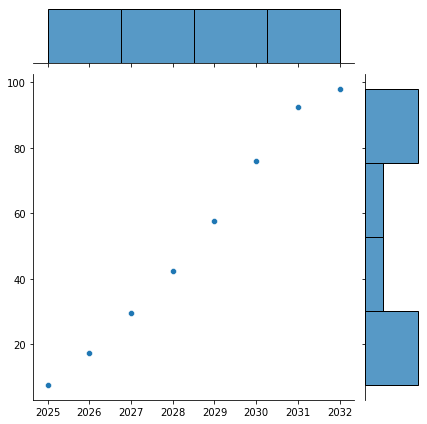

In [35]:
sns.jointplot(data= graph_df, x=year, y=percentage_of_peak, palette= 'rainbow', kind='scatter')

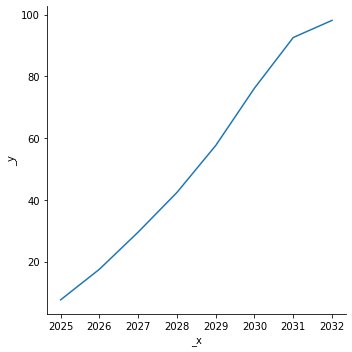

In [36]:
sns.relplot(data=graph_df, x=year, y=percentage_of_peak, kind='line', markers= True)